In [71]:
import _pickle as cPickle
import json
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

import sunpy.visualization.colormaps
font = {'family' : 'Open Sans',
        'weight' : 'normal',
        'size'   : 15}

from apply_hmi_psf import *

import matplotlib as mpl
mpl.rc_file_defaults()
plt.rc('font', **font)
mpl.rcParams['image.origin'] = 'lower'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import sunpy.visualization.colormaps as cm
magmap = mpl.colormaps['hmimag']

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/tmp/ipykernel_68766/2055470187.py:21: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
folder = '/data/slam/sinjan/arlongterm_pickles_hann_SL/'

In [5]:
with open(folder+f"HRTs_blos_remapped_on_HMI_20231012T000000_20231013T000000_hmipsf_True.pickle", "rb") as input_file:
    hrt_tmps = cPickle.load(input_file)

/scratch/slam/sinjan/.conda/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
with open(folder+f"HMIs_m_45s_20231012T000000_20231013T000000.pickle", "rb") as input_file:
    hmi_tmps = cPickle.load(input_file)

In [7]:
hrt_file = '/scratch/solo/phi/AR_Long_Term_2023_SL/l2/' + '2023-10-12/solo_L2_phi-hrt-blos_20231012T001503_V202501271029_0350120601.fits.gz'

In [8]:
hmi_map = hmi_tmps[0]
hrt_map = hrt_tmps[0]

In [33]:
hpc_coords = sunpy.map.all_coordinates_from_map(hmi_map)
mask = sunpy.map.coordinate_is_on_solar_disk(hpc_coords)

copy = mask.copy()
copy = np.where(copy < 1, np.nan, 1)

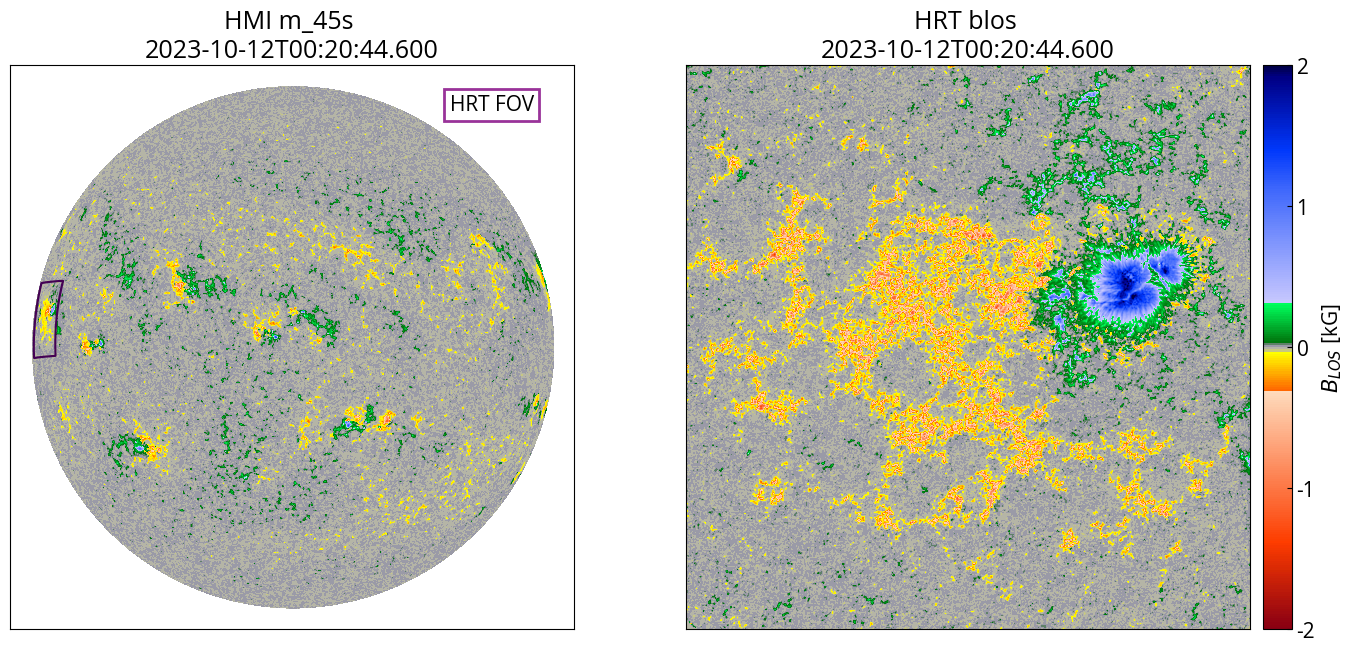

In [78]:
fig = plt.figure(figsize=(16,10))

cmax=2000
cmin=-cmax

ax = plt.subplot(121)
ax.set_aspect('equal')
ax.imshow(hmi_map.data*copy, origin = "lower", cmap = magmap, vmin = cmin, vmax = cmax)
ax.set_title(f"HMI m_45s \n{hmi_map.date.value}") 

#contour of HRT FOV
x = range(hmi_map.data.shape[1])
y = range(hmi_map.data.shape[0])
xv, yv = np.meshgrid(x, y)
tmp = np.nan_to_num(hrt_map.data, copy = True, nan = -20000)
cs = plt.contour(xv, yv, tmp, levels = [-20000])

# plt.xlim(0,500)
# plt.ylim(1900,2600)

#legend for contour
ylims = ax.get_ylim()
xlims = ax.get_xlim()
t = ax.text(0.78*xlims[1],0.92*ylims[1]-0.1, s = 'HRT FOV', fontsize=15)
t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='purple', linewidth=2))



ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])

ax2 = plt.subplot(122)
ax2.set_aspect('equal')
hrt_data = fits.getdata(hrt_file)
hrt_copy = ax2.imshow(hrt_data, origin = "lower", cmap = magmap, vmin = cmin, vmax = cmax)
ax2.set_title(f'HRT blos \n{hrt_map.date.value}')

ax2.xaxis.set_tick_params(labelbottom=False)
ax2.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax2.set_xticks([])
ax2.set_yticks([])

axins4 = inset_axes(ax2,width="5%",height="100%",loc='center right',borderpad=-2)
cbar = fig.colorbar(hrt_copy, cax=axins4, orientation="vertical", ticks=[-2000,-1000,0,1000,2000])
cbar.ax.yaxis.set_ticks_position('right')
cbar.set_label(r"$B_{LOS}$ [kG]")
cbar.ax.set_yticklabels(['-2','-1','0','1','2'])

plt.savefig('../plots/original_blos_hrt_hmi_m45s_full.png',bbox_inches='tight', dpi=300)
plt.show()

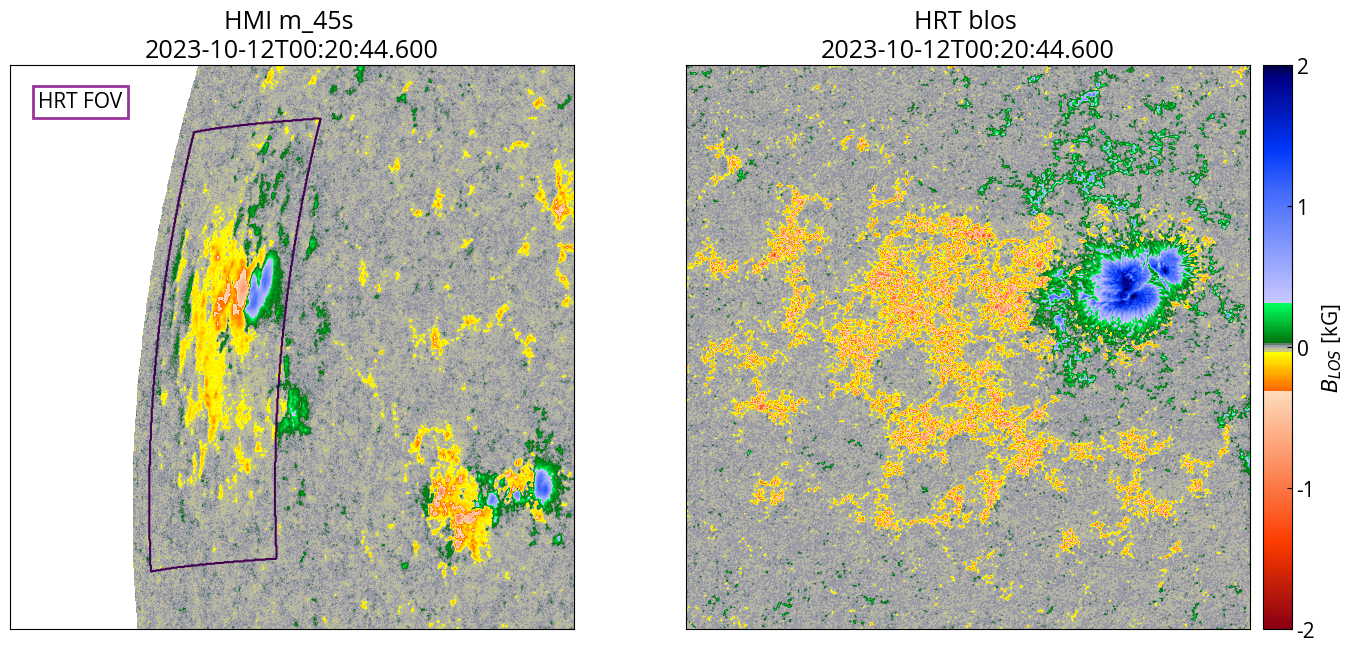

In [79]:
fig = plt.figure(figsize=(16,8))

cmax=2000
cmin=-cmax

ax = plt.subplot(121)
ax.set_aspect('equal')
ax.imshow(hmi_map.data*copy, origin = "lower", cmap = magmap, vmin = cmin, vmax = cmax)
ax.set_title(f"HMI m_45s \n{hmi_map.date.value}") 

#contour of HRT FOV
x = range(hmi_map.data.shape[1])
y = range(hmi_map.data.shape[0])
xv, yv = np.meshgrid(x, y)
tmp = np.nan_to_num(hrt_map.data, copy = True, nan = -20000)
cs = plt.contour(xv, yv, tmp, levels = [-20000])

plt.xlim(0,700)
plt.ylim(1900,2600)

#legend for contour
ylims = ax.get_ylim()
xlims = ax.get_xlim()
t = ax.text(0.05*xlims[1],0.98*ylims[1]-0.1, s = 'HRT FOV', fontsize=15)
t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='purple', linewidth=2))

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])

ax2 = plt.subplot(122)
ax2.set_aspect('equal')
hrt_data = fits.getdata(hrt_file)
hrt_copy = ax2.imshow(hrt_data, origin = "lower", cmap = magmap, vmin = cmin, vmax = cmax)
ax2.set_title(f'HRT blos \n{hrt_map.date.value}')

ax2.xaxis.set_tick_params(labelbottom=False)
ax2.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax2.set_xticks([])
ax2.set_yticks([])

axins4 = inset_axes(ax2,width="5%",height="100%",loc='center right',borderpad=-2)
cbar = fig.colorbar(hrt_copy, cax=axins4, orientation="vertical", ticks=[-2000,-1000,0,1000,2000])
cbar.ax.yaxis.set_ticks_position('right')
cbar.set_label(r"$B_{LOS}$ [kG]")
cbar.ax.set_yticklabels(['-2','-1','0','1','2'])

plt.savefig('../plots/original_blos_hrt_hmi_m45s_cutout.png',bbox_inches='tight', dpi=300)
plt.show()

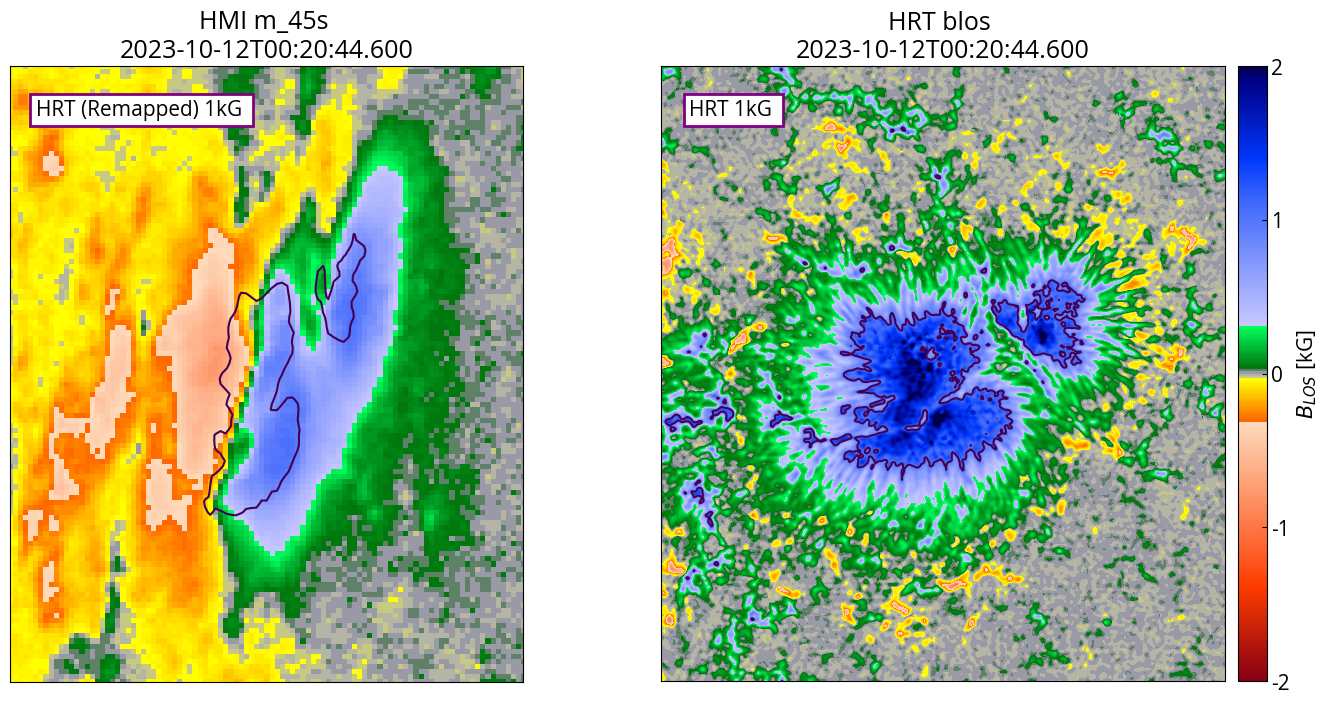

In [90]:
fig = plt.figure(figsize=(16,8))

cmax=2000
cmin=-cmax

ax = plt.subplot(121)
ax.set_aspect('equal')
ax.imshow(hmi_map.data*copy, origin = "lower", cmap = magmap, vmin = cmin, vmax = cmax)
ax.set_title(f"HMI m_45s \n{hmi_map.date.value}") 

plt.xlim(250,350)
plt.ylim(2260,2380)

#contour of HRT FOV
x = range(hmi_map.data.shape[1])
y = range(hmi_map.data.shape[0])
xv, yv = np.meshgrid(x, y)
cs = plt.contour(xv, yv, hrt_map.data, levels = [1000])
#plt.clabel(cs, inline=False)

#legend for contour
ylims = ax.get_ylim()
xlims = ax.get_xlim()
t = ax.text(0.05*(xlims[1]-xlims[0])+xlims[0],(0.92*(ylims[1]-ylims[0])+ylims[0])-0.1, s = 'HRT (Remapped) 1kG ', fontsize=15)
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='purple', linewidth=2))

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])

ax2 = plt.subplot(122)
ax2.set_aspect('equal')
hrt_data = fits.getdata(hrt_file)
hrt_copy = ax2.imshow(hrt_data, origin = "lower", cmap = magmap, vmin = cmin, vmax = cmax)
ax2.set_title(f'HRT blos \n{hrt_map.date.value}')

plt.ylim(800,1400)
plt.xlim(1150,1700)

#contour of HRT FOV
x = range(hrt_data.shape[1])
y = range(hrt_data.shape[0])
xv, yv = np.meshgrid(x, y)
cs = plt.contour(xv, yv, hrt_data, levels = [1000])
#plt.clabel(cs, inline=False)

#legend for contour
ylims = ax2.get_ylim()
xlims = ax2.get_xlim()
t = ax2.text(0.05*(xlims[1]-xlims[0])+xlims[0],(0.92*(ylims[1]-ylims[0])+ylims[0])-0.1, s = 'HRT 1kG ', fontsize=15)
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='purple', linewidth=2))

ax2.xaxis.set_tick_params(labelbottom=False)
ax2.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax2.set_xticks([])
ax2.set_yticks([])

axins4 = inset_axes(ax2,width="5%",height="100%",loc='center right',borderpad=-2)
cbar = fig.colorbar(hrt_copy, cax=axins4, orientation="vertical", ticks=[-2000,-1000,0,1000,2000])
cbar.ax.yaxis.set_ticks_position('right')
cbar.set_label(r"$B_{LOS}$ [kG]")
cbar.ax.set_yticklabels(['-2','-1','0','1','2'])

plt.savefig('../plots/original_blos_hrt_hmi_m45s_zoom.png',bbox_inches='tight', dpi=300)
plt.show()

0.1559012033565535
153


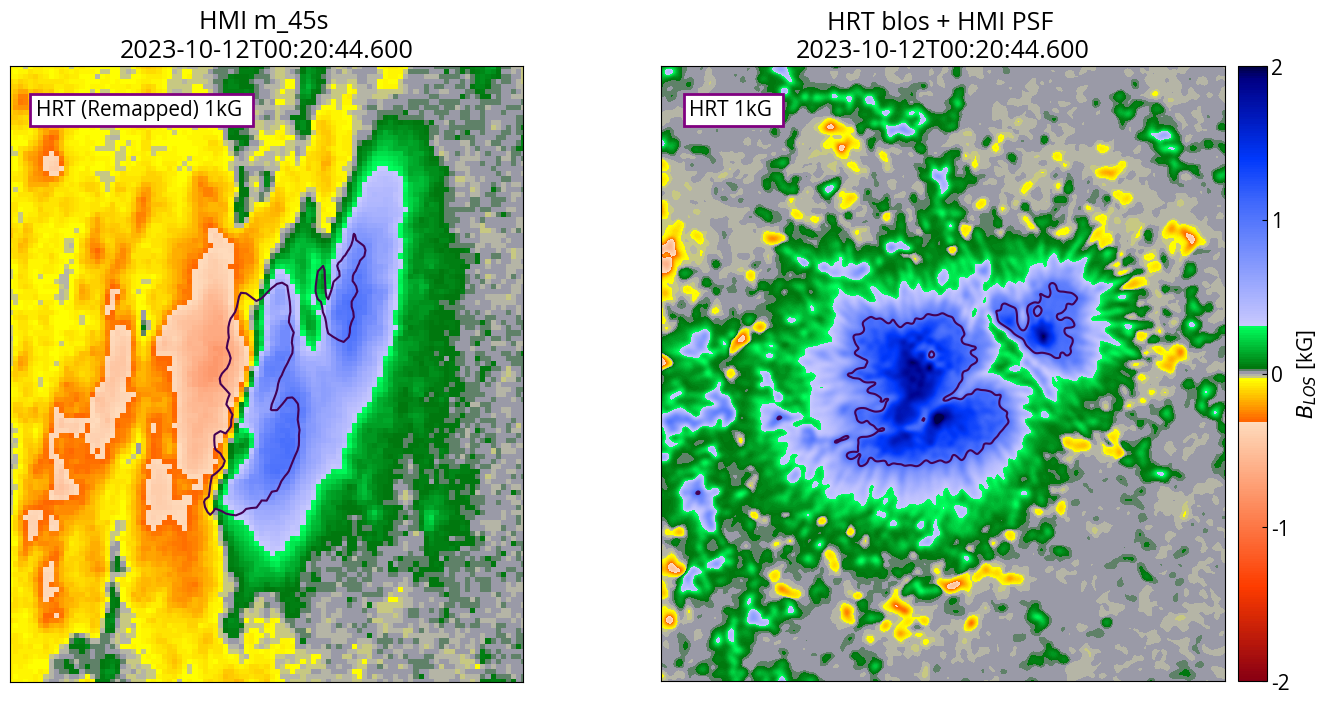

In [91]:
fig = plt.figure(figsize=(16,8))

cmax=2000
cmin=-cmax

ax = plt.subplot(121)
ax.set_aspect('equal')
ax.imshow(hmi_map.data*copy, origin = "lower", cmap = magmap, vmin = cmin, vmax = cmax)
ax.set_title(f"HMI m_45s \n{hmi_map.date.value}") 

plt.xlim(250,350)
plt.ylim(2260,2380)

#contour of HRT FOV
x = range(hmi_map.data.shape[1])
y = range(hmi_map.data.shape[0])
xv, yv = np.meshgrid(x, y)
cs = plt.contour(xv, yv, hrt_map.data, levels = [1000])
#plt.clabel(cs, inline=False)

#legend for contour
ylims = ax.get_ylim()
xlims = ax.get_xlim()
t = ax.text(0.05*(xlims[1]-xlims[0])+xlims[0],(0.92*(ylims[1]-ylims[0])+ylims[0])-0.1, s = 'HRT (Remapped) 1kG ', fontsize=15)
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='purple', linewidth=2))

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])

ax2 = plt.subplot(122)
ax2.set_aspect('equal')
hrt_data = fits.getdata(hrt_file)
h = fits.getheader(hrt_file)
phi_dsun = h['DSUN_OBS']
hmi_psf = make_psf_hmi_th(hrt_data.shape[0],phi_dsun)
hmi_psf /= hmi_psf.max()
hrt_data_psf = fftshift(ifft2(fft2(hrt_data)/hrt_data.size * fft2(hmi_psf/hmi_psf.sum())).real * hrt_data.size) 

hrt_copy = ax2.imshow(hrt_data_psf, origin = "lower", cmap = magmap, vmin = cmin, vmax = cmax)
ax2.set_title(f'HRT blos + HMI PSF \n{hrt_map.date.value}')

plt.ylim(800,1400)
plt.xlim(1150,1700)

#contour of HRT FOV
x = range(hrt_data.shape[1])
y = range(hrt_data.shape[0])
xv, yv = np.meshgrid(x, y)
cs = plt.contour(xv, yv, hrt_data_psf, levels = [1000])
#plt.clabel(cs, inline=False)

ax2.xaxis.set_tick_params(labelbottom=False)
ax2.yaxis.set_tick_params(labelleft=False)

#legend for contour
ylims = ax2.get_ylim()
xlims = ax2.get_xlim()
t = ax2.text(0.05*(xlims[1]-xlims[0])+xlims[0],(0.92*(ylims[1]-ylims[0])+ylims[0])-0.1, s = 'HRT 1kG ', fontsize=15)
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='purple', linewidth=2))

# Hide X and Y axes tick marks
ax2.set_xticks([])
ax2.set_yticks([])

axins4 = inset_axes(ax2,width="5%",height="100%",loc='center right',borderpad=-2)
cbar = fig.colorbar(hrt_copy, cax=axins4, orientation="vertical", ticks=[-2000,-1000,0,1000,2000])
cbar.ax.yaxis.set_ticks_position('right')
cbar.set_label(r"$B_{LOS}$ [kG]")
cbar.ax.set_yticklabels(['-2','-1','0','1','2'])

plt.savefig('../plots/original_blos_hrt_hmi_m45s_zoom_hmipsf.png',bbox_inches='tight', dpi=300)
plt.show()